In [3]:
import quantopian
from quantopian.pipeline import Pipeline
from sklearn import tree,ensemble,decomposition
import numpy as np
import pandas as pd
import talib
from quantopian.pipeline.data import Fundamentals
from quantopian.research import run_pipeline
from quantopian.pipeline.filters import StaticAssets
from datetime import datetime
from quantopian.pipeline.data import morningstar as mstar
from quantopian.pipeline.filters.morningstar import Q500US, Q1500US
from quantopian.pipeline.data.builtin import USEquityPricing

(a) PCA to transform parameters

In [4]:
def stock_universe():
    sector = mstar.asset_classification.morningstar_sector_code.latest
    sectors_311 = sector.eq(311)
    pipe = Pipeline(
    columns={'name': USEquityPricing.close.latest},
    screen=Q500US() & sectors_311
    )
    return run_pipeline(pipe, '2017-01-02', '2017-01-02')
stock_universe()

name
2017-01-03 00:00:00+00:00 Equity(24 [AAPL])       115.840
                          Equity(67 [ADSK])        74.010
                          Equity(114 [ADBE])      102.950
                          Equity(122 [ADI])        72.610
                          Equity(337 [AMAT])       32.270
                          Equity(351 [AMD])        11.340
                          Equity(1419 [CERN])      47.370
                          Equity(1898 [CSC])       59.420
                          Equity(1900 [CSCO])      30.250
                          Equity(2602 [EA])        78.760
                          Equity(3241 [GLW])       24.280
                          Equity(3455 [HAR])      111.170
                          Equity(3735 [HPQ])       14.840
                          Equity(3766 [IBM])      165.980
                          Equity(3951 [INTC])      36.290
                          Equity(4246 [KLAC])      78.680
                          Equity(4485 [LLTC])      62.360
                          Equity(4537 [LRCX])     105.700
                          Equity(4974 [MSI])       82.940
                          Equity(5061 [MSFT])      62.150
                          Equity(5121 [MU])        21.920
                          Equity(5692 [ORCL])      38.310
                          Equity(6295 [QCOM])      65.209
                          Equity(7272 [SYMC])      23.895
                          Equity(7671 [TXN])       72.980
                          Equity(8132 [WDC])       67.950
                          Equity(8344 [XLNX])      60.360
                          Equity(8655 [INTU])     114.610
                          Equity(8677 [MCHP])      64.150
                          Equity(9883 [ATVI])      36.110
...                                                   ...
                          Equity(20208 [FFIV])    144.720
                          Equity(20239 [JNPR])     28.270
                          Equity(20541 [RHT])      69.710
                          Equity(20680 [AKAM])     66.680
                          Equity(23276 [AYI])     230.990
                          Equity(23821 [SWKS])     74.660
                          Equity(24518 [STX])      38.180
                          Equity(25555 [ACN])     117.160
                          Equity(26401 [CRM])      68.480
                          Equity(26578 [GOOG_L])  792.620
                          Equity(32902 [FSLR])     32.080
                          Equity(33321 [ACIA])     61.760
                          Equity(34014 [TEL])      69.290
                          Equity(34545 [VMW])      78.730
                          Equity(38650 [AVGO])    176.800
                          Equity(42596 [YELP])     38.130
                          Equity(42815 [SPLK])     51.150
                          Equity(42950 [FB])      115.140
                          Equity(43127 [NOW])      74.330
                          Equity(43202 [PANW])    125.050
                          Equity(43510 [WDAY])     66.090
                          Equity(45451 [FEYE])     11.910
                          Equity(45815 [TWTR])     16.290
                          Equity(46776 [SABR])     24.960
                          Equity(47208 [GPRO])      8.700
                          Equity(47430 [MBLY])     38.130
                          Equity(48384 [QRVO])     52.730
                          Equity(49139 [FIT])       7.310
                          Equity(49506 [HPE])      23.150
                          Equity(50077 [TWLO])     28.895

[67 rows x 1 columns]

In [5]:
temp = stock_universe().reset_index(col_level=1)
temp = temp['level_1']
s=[]
for i in temp.tolist():
    s.append(i.symbol.encode('ascii','ignore'))

In [6]:
start_date = '2017-01-01'
end_date = '2017-11-30'
diluted_eps = Fundamentals.diluted_eps_earnings_reports.latest
growth_score = Fundamentals.growth_score.latest
tangible_bv = Fundamentals.tangible_book_value.latest
stocks = StaticAssets(symbols(['AAPL'])) 

# Create a pipline and add a fundamental factor

pipe = Pipeline()
pipe.add(diluted_eps, 'diluted_eps')
pipe.add(growth_score, 'growth_score')
pipe.add(tangible_bv, 'tangible_book_value')
pipe.set_screen(stocks)

# Print out the pipeline results listing the data and the dates
valuations = run_pipeline(pipe, start_date, end_date)
valuations = valuations.rename_axis(['Date', 'Name'])
valuations

,,diluted_eps,growth_score,tangible_book_value
Date,Name,,,
2017-01-03 00:00:00+00:00,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11
2017-01-04 00:00:00+00:00,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11
2017-01-05 00:00:00+00:00,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11
2017-01-06 00:00:00+00:00,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11
2017-01-09 00:00:00+00:00,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11
2017-01-10 00:00:00+00:00,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11
2017-01-11 00:00:00+00:00,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11
2017-01-12 00:00:00+00:00,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11
2017-01-13 00:00:00+00:00,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11


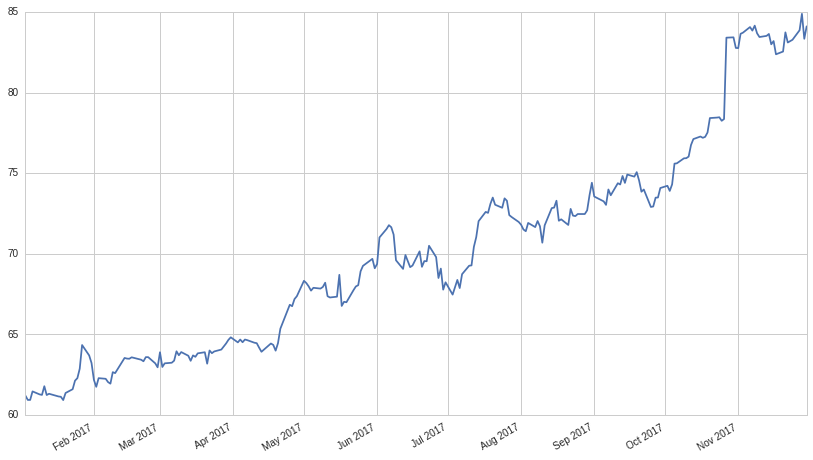

In [7]:
aapl_minute_closes = get_pricing(
    'MSFT', 
    fields = 'close_price', #modify to price, open_price, high, low or volume to change the field
    start_date = start_date, #customize your pricing date range
    end_date = end_date, 
    frequency = 'daily', #change to daily for daily pricing
)

# matplotlib is installed for easy plotting
aapl_minute_closes.plot()

In [8]:
raw_set = get_pricing('AAPL', start_date = start_date, end_date = end_date, frequency='daily');
for i in range(1,67):
    raw_set=raw_set.append(get_pricing(s[i], start_date = start_date, end_date = end_date, frequency='daily'));
# setting up indicators and class
raw_set['RSI'] = pd.Series(talib.RSI(raw_set.close_price, timeperiod=3), index = raw_set.index);
raw_set['EMA'] = pd.Series(talib.EMA(raw_set.close_price, timeperiod=3), index = raw_set.index);
raw_set['MACD_high'] = pd.Series(talib.MACD(raw_set.close_price, fastperiod=12, slowperiod=26, signalperiod=9)[0], index = raw_set.index);
raw_set['MACD_signal'] = pd.Series(talib.MACD(raw_set.close_price, fastperiod=12, slowperiod=26, signalperiod=9)[1], index = raw_set.index);
raw_set['MACD'] = raw_set['MACD_high'] - raw_set['MACD_signal']
raw_set['SMA_5'] = pd.Series(talib.SMA(raw_set.close_price, timeperiod=5), index = raw_set.index);
raw_set['SMA_10'] = pd.Series(talib.SMA(raw_set.close_price, timeperiod=10), index = raw_set.index);
raw_set['ROC'] = pd.Series(talib.ROC(raw_set.close_price, timeperiod=1), index = raw_set.index);
raw_set['ADX'] = pd.Series(talib.ADX(raw_set.high, raw_set.low, raw_set.close_price, timeperiod=14), index = raw_set.index);


raw_set['Class'] = pd.cut(raw_set['ROC'], [-np.inf, 0, np.inf], labels=['Down', 'Up'])
raw_set['ClassValue'] = pd.cut(raw_set['ROC'], [-np.inf, 0, np.inf], labels=[0, 1])

#raw_set = raw_set[33:]
raw_set = raw_set.rename_axis(['Date'])


In [9]:
# join valuation data with technical data
raw_set = pd.merge(raw_set.reset_index(), valuations.reset_index(), on='Date', how='inner')
raw_set['pe_ratio'] = raw_set['price'] / raw_set['diluted_eps']
#raw_set = raw_set[33:]
raw_set=raw_set[np.isfinite(raw_set['MACD_high'])]

In [10]:
raw_set

,Date,open_price,high,low,close_price,volume,price,RSI,EMA,MACD_high,...,SMA_10,ROC,ADX,Class,ClassValue,Name,diluted_eps,growth_score,tangible_book_value,pe_ratio
1,2017-01-03 00:00:00+00:00,74.610,77.100,74.500,76.170,1458514.0,76.170,1.901060,123.903244,-5.388077,...,162.7630,-55.650655,27.028526,Down,0.0,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11,45.071006
2,2017-01-03 00:00:00+00:00,103.430,104.030,102.810,103.480,1732101.0,103.480,4.319690,109.021108,-1.816018,...,122.1414,-5.592555,35.795454,Down,0.0,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11,61.230769
3,2017-01-03 00:00:00+00:00,71.033,72.529,70.534,70.935,2054078.0,70.935,3.053808,126.046249,-5.550876,...,171.5755,-60.900121,47.724930,Down,0.0,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11,41.973373
4,2017-01-03 00:00:00+00:00,32.067,32.414,31.373,31.641,11865956.0,31.641,1.393892,58.914929,-5.006258,...,82.5702,-63.255139,29.357928,Down,0.0,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11,18.722485
5,2017-01-03 00:00:00+00:00,11.420,11.650,11.020,11.420,52110581.0,11.420,0.687759,32.687405,-3.353695,...,51.9576,-78.358916,36.025994,Down,0.0,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11,6.757396
6,2017-01-03 00:00:00+00:00,47.700,49.460,47.580,49.410,2218274.0,49.410,99.291576,30.197880,2.727206,...,15.0730,353.302752,26.600804,Up,1.0,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11,29.236686
7,2017-01-03 00:00:00+00:00,59.367,59.677,56.942,57.172,2269084.0,57.172,7.559395,63.673897,-0.562005,...,67.5352,-19.100042,28.014411,Down,0.0,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11,33.829586
68,2017-01-04 00:00:00+00:00,76.190,77.960,76.090,77.510,1496155.0,77.510,3.841395,100.706622,-11.345977,...,153.5030,1.759223,31.022670,Up,1.0,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11,45.863905
69,2017-01-04 00:00:00+00:00,103.740,104.370,103.495,104.130,1244090.0,104.130,9.778485,106.575554,-2.897114,...,119.8064,0.628141,37.381215,Up,1.0,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11,61.615385
70,2017-01-04 00:00:00+00:00,71.200,71.450,70.691,70.798,1299872.0,70.798,3.048499,98.422125,-12.635257,...,160.4343,-0.193135,50.328626,Down,0.0,Equity(24 [AAPL]),1.69,74.08660,1.196290e+11,41.892308


In [11]:
temp = raw_set.drop(['Name', 'Class', 'ClassValue', 'MACD_high', 'MACD_signal'],axis=1)
temp = temp.ix[:,7:]

In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(temp)

In [13]:
pca = decomposition.PCA(n_components=11)
pca.fit(X_std)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
X_std2 = pca.transform(X_std)

[  3.97465495e+00   2.02111059e+00   1.39735604e+00   1.36670928e+00
   9.07611258e-01   5.50118140e-01   5.25748714e-01   2.23188432e-01
   3.13867673e-02   1.50258687e-03   6.13250698e-04]
[  3.61332268e-01   1.83737326e-01   1.27032367e-01   1.24246298e-01
   8.25101144e-02   5.00107400e-02   4.77953377e-02   2.02898574e-02
   2.85334248e-03   1.36598807e-04   5.57500635e-05]


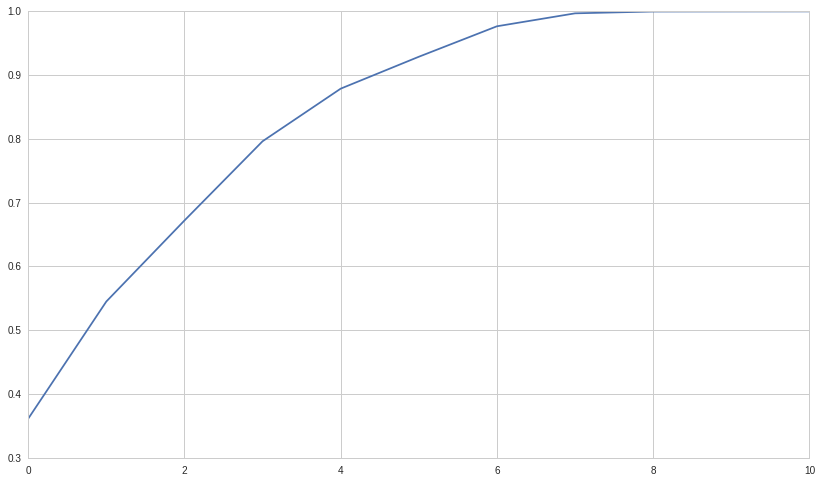

In [14]:
import matplotlib.pyplot as plt
cum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum)
plt.show()

(b) Cross-Validation to pick regularization parameter

In [25]:
size=raw_set.shape[0]
test_set = raw_set[int(size*0.8):];

training_set = raw_set[0:int(size*0.8)];

In [26]:
training_set[:5]

,Date,open_price,high,low,close_price,volume,price,RSI,EMA,MACD_high,...,SMA_10,ROC,ADX,Class,ClassValue,Name,diluted_eps,growth_score,tangible_book_value,pe_ratio
1,2017-01-03 00:00:00+00:00,74.610,77.100,74.500,76.170,1458514.0,76.170,1.901060,123.903244,-5.388077,...,162.7630,-55.650655,27.028526,Down,0.0,Equity(24 [AAPL]),1.69,74.0866,1.196290e+11,45.071006
2,2017-01-03 00:00:00+00:00,103.430,104.030,102.810,103.480,1732101.0,103.480,4.319690,109.021108,-1.816018,...,122.1414,-5.592555,35.795454,Down,0.0,Equity(24 [AAPL]),1.69,74.0866,1.196290e+11,61.230769
3,2017-01-03 00:00:00+00:00,71.033,72.529,70.534,70.935,2054078.0,70.935,3.053808,126.046249,-5.550876,...,171.5755,-60.900121,47.724930,Down,0.0,Equity(24 [AAPL]),1.69,74.0866,1.196290e+11,41.973373
4,2017-01-03 00:00:00+00:00,32.067,32.414,31.373,31.641,11865956.0,31.641,1.393892,58.914929,-5.006258,...,82.5702,-63.255139,29.357928,Down,0.0,Equity(24 [AAPL]),1.69,74.0866,1.196290e+11,18.722485
5,2017-01-03 00:00:00+00:00,11.420,11.650,11.020,11.420,52110581.0,11.420,0.687759,32.687405,-3.353695,...,51.9576,-78.358916,36.025994,Down,0.0,Equity(24 [AAPL]),1.69,74.0866,1.196290e+11,6.757396


In [27]:
training_size = int(training_set.shape[0])
test_size = int(test_set.shape[0])
print(training_size)
print(test_size)

1316
330


Let's pick the relevant features in terms of predicting

In [28]:
feature_columns = ['RSI', 'MACD', 'EMA','SMA_5','SMA_10','ADX', 'diluted_eps', 'growth_score', 'tangible_book_value']
response_column = ['ClassValue']

In [126]:
clf = tree.DecisionTreeClassifier(max_depth=1,max_leaf_nodes=2)

clf.fit(training_set[feature_columns].values, training_set[response_column].values)

training_response = clf.predict(training_set[feature_columns].values)
training_error = np.sum(np.square(training_response - training_set[response_column].values.flatten()))
training_error_ratio = float(training_error.item())/int(training_size)*100
print('Error on training set %.8f %%' % training_error_ratio)

test_response = clf.predict(test_set[feature_columns].values)
test_error=np.matrix([[0,0],[0,0]])
for i in range(test_size):
    if(test_response[i]==0):
        if(test_set[response_column].values.flatten()[i]==0):
            test_error[0,0]=test_error[0,0]+1
        else:
            test_error[0,1]=test_error[0,1]+1
    else:
        if(test_set[response_column].values.flatten()[i]==0):
            test_error[1,0]=test_error[1,0]+1
        else:
            test_error[1,1]=test_error[1,1]+1

#test_error = np.sum(np.square(test_response - test_set[response_column].values.flatten()))
#test_error_ratio = float(test_error.item())/int(test_size)*100
print(test_error)
print('Error on test set %.8f %%' % test_error_ratio)

Error on training set 25.00000000 %
[[101  50]
 [ 37 142]]
Error on test set 26.36363636 %


Now let's try the random forest classifier

In [112]:
clf_2 = ensemble.RandomForestClassifier()
clf_2.fit(training_set[feature_columns].values, training_set[response_column].values)

training_response = clf_2.predict(training_set[feature_columns].values)
training_error = np.sum(np.square(training_response - training_set[response_column].values.flatten()))
training_error_ratio = float(training_error.item())/int(training_size)*100
print('Error on training set %.8f %%' % training_error_ratio)

test_response = clf_2.predict(test_set[feature_columns].values)
test_error = np.sum(np.square(test_response - test_set[response_column].values.flatten()))
test_error_ratio = float(test_error.item())/int(test_size)*100
print('Error on test set %.8f %%' % test_error_ratio)

Error on training set 1.67173252 %
Error on test set 26.36363636 %


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Classifier seems to work better than Decision Tree Classfier

In [ ]:
clf_3 = ensemble.AdaBoostClassifier()
clf_3.fit(training_set[feature_columns].values, training_set[response_column].values)

training_response = clf_3.predict(training_set[feature_columns].values)
training_error = np.sum(np.square(training_response - training_set[response_column].values.flatten()))
training_error_ratio = float(training_error.item())/int(training_size)*100
print('Error on training set %.8f %%' % training_error_ratio)

test_response = clf_3.predict(test_set[feature_columns].values)
test_error = np.sum(np.square(test_response - test_set[response_column].values.flatten()))
test_error_ratio = float(test_error.item())/int(test_size)*100
print('Error on test set %.8f %%' % test_error_ratio)

AdaBoost seems to work better than Random Forest from time to time, while generally better than Decision Tree.

In [ ]:
from quantopian.pipeline.filters.morningstar import Q500US, Q1500US
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.data import morningstar as mstar
def stock_universe():
    sector = mstar.asset_classification.morningstar_sector_code.latest
    sectors_311 = sector.eq(311)
    pipe = Pipeline(
    columns={'name': USEquityPricing.close.latest},
    screen=Q500US() & sectors_311
    )
    return run_pipeline(pipe, '2016-01-02', '2016-01-02')
stock_universe().index.values.shape

In [ ]:
name = stock_universe().reset_index()['level_1'].values

In [ ]:
dictionary = {}
dictionary[name] = [0]
print(dictionary)
print(len(dictionary[name]))

In [ ]:
data.history(symbols('AAPL'), 'price', 20, '1d')

In [ ]:
type(name)